In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns

In [2]:
df= pd.read_csv('Data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


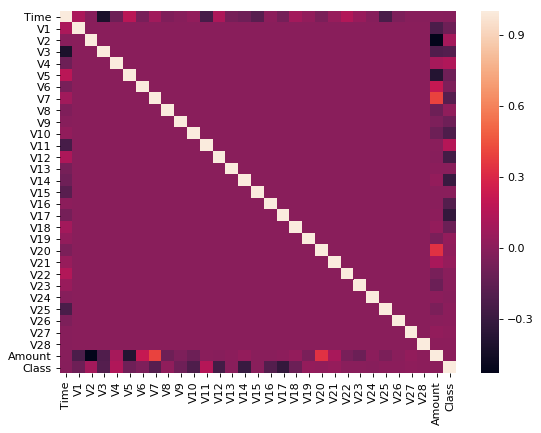

In [3]:
corr= df.corr()
figure(figsize= (8,6), dpi= 80)
sns.heatmap(corr)

In [4]:
shuffled= df.sample(frac= 1, random_state= 5)
fraud= shuffled.loc[shuffled['Class'] == 1]
non_fraud= shuffled.loc[shuffled['Class'] == 0].sample(n=2000, random_state= 42)

normalized_df = pd.concat([fraud, non_fraud])

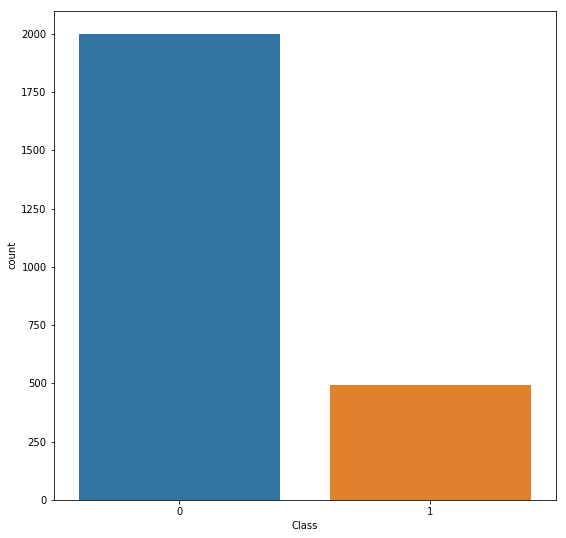

In [5]:
plt.figure(figsize= (9,9))
sns.countplot('Class', data= normalized_df)

In [6]:
from sklearn.model_selection import train_test_split
X= normalized_df.drop('Class',axis=1)
Y= normalized_df['Class'].values
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size= 0.5, random_state= 4)

In [7]:
from sklearn.ensemble import RandomForestRegressor

rfr= RandomForestRegressor(n_estimators= 200, max_depth= 8)
rfr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [8]:
yHat= rfr.predict(x_test)

In [9]:
yHat = yHat.round()

In [10]:
from sklearn import metrics
print('ROC:', metrics.roc_auc_score(y_test, yHat))

ROC: 0.9180859592290828


In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yHat, labels=[1,0]))

[[205  39]
 [  4 998]]


Confusion matrix, without normalization
[[205  39]
 [  4 998]]


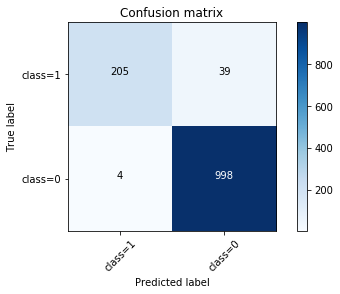

In [12]:
cnf_matrix = confusion_matrix(y_test, yHat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['class=1','class=0'],normalize= False,  title='Confusion matrix')

### Using RandomForest Classifier to check if the performance is same

In [15]:
from sklearn.ensemble import RandomForestClassifier

rfrC= RandomForestClassifier(n_estimators= 200, max_depth=8)
rfrC.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
yHat= rfrC.predict(x_test)

In [20]:
from sklearn import metrics
print('ROC:', metrics.roc_auc_score(y_test, yHat))

ROC: 0.9195829652171067


In [21]:
yHat

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

Confusion matrix, without normalization
[[ 205   39]
 [   1 1001]]


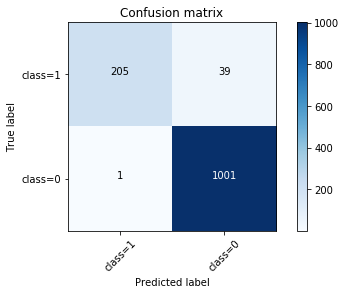

In [22]:
cnf_matrix = confusion_matrix(y_test, yHat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['class=1','class=0'],normalize= False,  title='Confusion matrix')

# My model performs at roc_auc_score of 0.9195. This is good enough with a random forest classifier. 